# Polynomial Regression

In [1]:
import numpy as np, matplotlib.pyplot as plt

In [2]:
m = 50
np.random.seed(42)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + 2 * np.random.randn(m, 1)

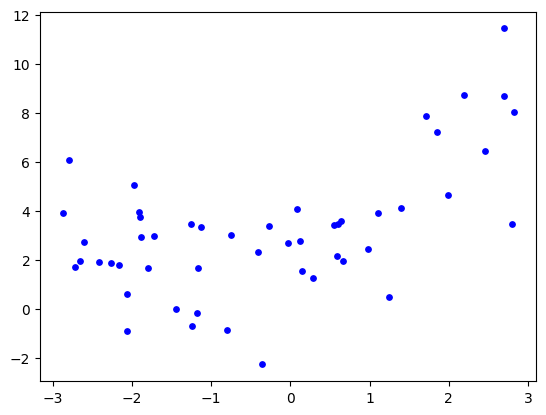

In [3]:
plt.scatter(X, y, c='b', s=15)
plt.show()

## Scikit-Learn

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

[1.78205291]
[[ 0.49488435  0.81709946  0.34096408 -0.04275207 -0.04025599]]


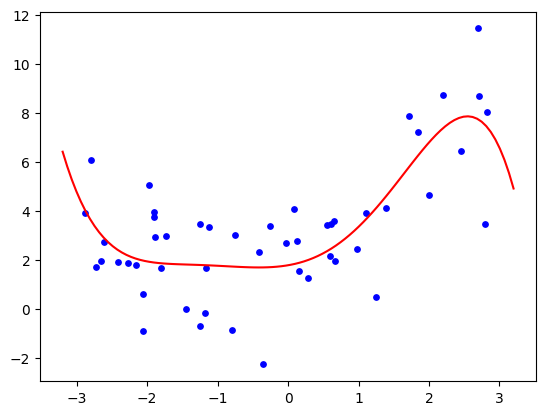

In [6]:
x = np.linspace(-3.2, 3.2, 100).reshape(100, 1)

def y_n_degree_model(model, x, n):
    y = np.zeros((x.shape[0], 1))
    for i in range(n):
        y += model.coef_.reshape(1, -1)[0, i] * x ** (i + 1)
    return y + model.intercept_

plt.scatter(X, y, c='b', s=15)
plt.plot(x, y_n_degree_model(lin_reg, x, 5), c='r')
plt.show()

## Learning Curves

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for i in range(1, len(X_train)):
        model.fit(X_train[:i], y_train[:i])
        y_train_pred = model.predict(X_train[:i])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:i], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))
    plt.plot(np.sqrt(train_errors), c='r', lw=2, label='train')
    plt.plot(np.sqrt(val_errors), c='b', lw=2, label='validation')
    plt.axis([-5, 85, -0.25, 3.5])
    plt.legend()
    plt.show()

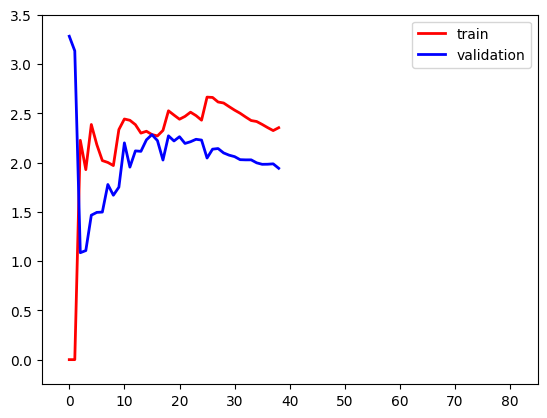

In [9]:
# linear model
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [10]:
from sklearn.pipeline import Pipeline

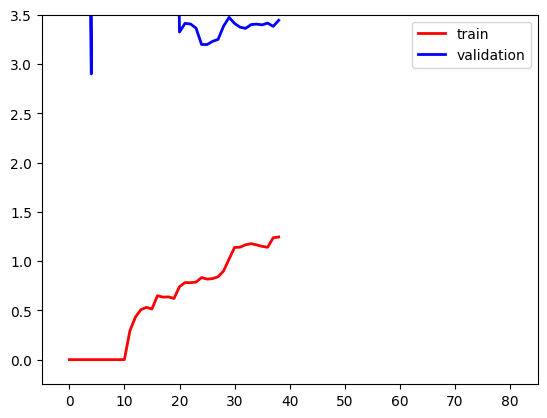

In [11]:
# 10th degree model
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(poly_reg, X, y)

## Regularization

## Ridge Regression

### equation: $\theta = (X^{T}X + \alpha A)^{-1} X^{T} y$
---
$A$ is identity matrix ($I$) with its first element ($i=0, j=0$) being zero

---
### error function: $MSE(\theta) = (X\theta - y)^{T}(X\theta - y) + \alpha w^{T} w$
### gradient of error function (half): $\triangledown_\theta = X^{T}(X\theta - y) + \alpha w$
---
$\theta_{0}$ (intercept) is not regularized; so $w$ is $\theta$ which its first element is zero

---

In [12]:
alpha = 100   # hyperparameter
A = np.eye(6)
A[0, 0] = 0

# equation
X_poly_b = np.concatenate((np.ones((m, 1)), X_poly), axis=1)
theta = np.linalg.inv(X_poly_b.T.dot(X_poly_b) + alpha * A).dot(X_poly_b.T).dot(y)
print(theta)

[[ 2.37589998]
 [ 0.14040125]
 [ 0.13984826]
 [ 0.27898782]
 [ 0.04057687]
 [-0.02482433]]


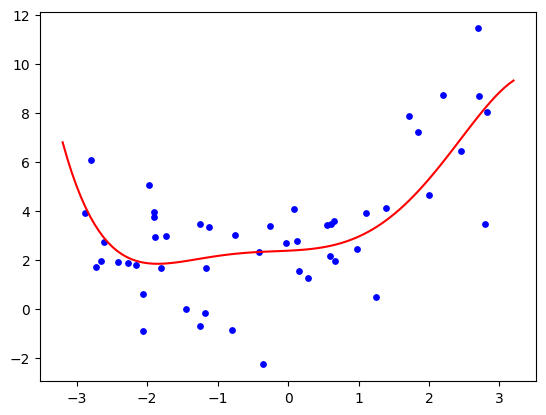

In [13]:
def y_n_degree_theta(theta, x, n):
    y = np.zeros((x.shape[0], 1))
    for i in range(n + 1):
        y += theta[i] * x ** i
    return y

plt.scatter(X, y, c='b', s=15)
plt.plot(x, y_n_degree_theta(theta, x, 5), c='r')
plt.show()

In [14]:
# gradient descent

theta = np.array([[1.0], [1.0], [1.0], [1.0], [1.0], [1.0]])

alpha = 100
eta = 7e-6
n_iterations = 35000

for iteration in range(n_iterations):
    w = np.copy(theta)
    w[0, 0] = 0
    grad = X_poly_b.T.dot(X_poly_b.dot(theta) - y) + alpha * w
    theta -= eta * grad

print(theta)

[[ 2.37105234]
 [ 0.14038397]
 [ 0.14093571]
 [ 0.27886809]
 [ 0.04052856]
 [-0.024808  ]]


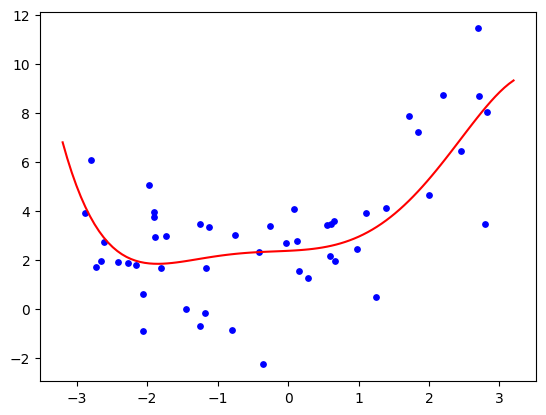

In [15]:
plt.scatter(X, y, c='b', s=15)
plt.plot(x, y_n_degree_theta(theta, x, 5), c='r')
plt.show()

### Scikit-Learn

In [16]:
from sklearn.linear_model import Ridge, SGDRegressor

[2.37589998]
[[ 0.14040125  0.13984826  0.27898782  0.04057687 -0.02482433]]


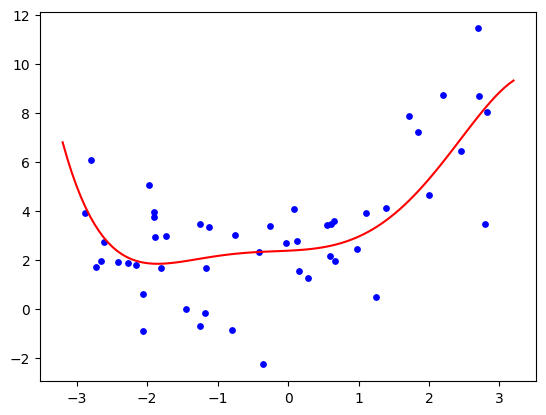

In [17]:
# ridge (simple)
ridge_reg = Ridge(alpha=100, solver='cholesky')
ridge_reg.fit(X_poly, y)
print(ridge_reg.intercept_)
print(ridge_reg.coef_)

plt.scatter(X, y, c='b', s=15)
plt.plot(x, y_n_degree_model(ridge_reg, x, 5), c='r')
plt.show()

[3.04469717]
[0.05169272 0.0509428  0.04598054 0.04818256 0.04054166]


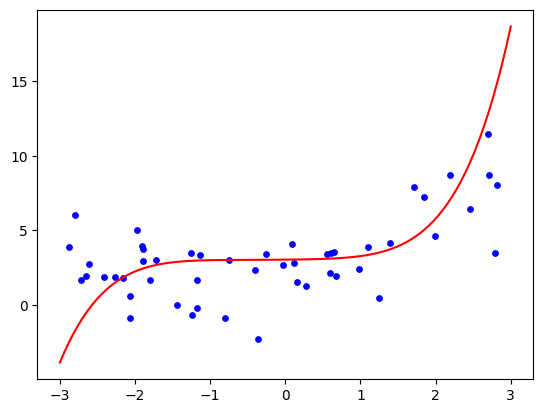

In [23]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
sgd_reg = SGDRegressor(penalty='l2', alpha=30)

# SGD
X_poly_scaled = std_scaler.fit_transform(X_poly)
sgd_reg.fit(X_poly_scaled, y.ravel())
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

x = np.linspace(-3, 3, 100).reshape(100, 1)
plt.scatter(X, y, c='b', s=15)
plt.plot(x, y_n_degree_model(sgd_reg, x, 5), c='r')
plt.show()

## Lasso Regression

In [19]:
from sklearn.linear_model import Lasso

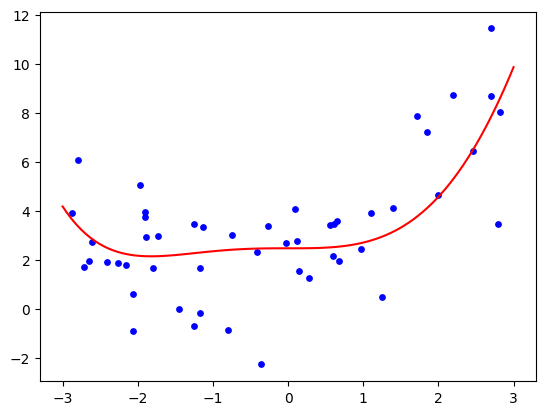

In [20]:
# scikit-learn

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_poly, y)

plt.scatter(X, y, c='b', s=15)
plt.plot(x, y_n_degree_model(lasso_reg, x, 5), c='r')
plt.show()

## Elastic Net

### regularization term: $r\alpha l_{1} + \frac{1 - r}{2}\alpha l_{2}$

In [21]:
from sklearn.linear_model import ElasticNet

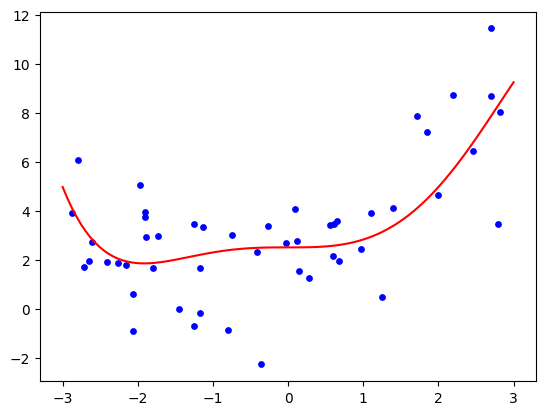

In [22]:
# scikit-learn

elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(X_poly, y)

plt.scatter(X, y, c='b', s=15)
plt.plot(x, y_n_degree_model(elastic_net, x, 5), c='r')
plt.show()

## Early Stopping

stops at the minimum point of validation set RMSE, while iterating